<img src="enset.png" width="200" height="50" style="float: right; margin-left: 0px;">

<u><h1>Systèmes Décisionnels & Data-Mining</h1></u>



## Classification (K-Moyennes)

<span style="background-color: yellow;">Algorithme</span>

#### Phase d'initialisation (t = 0) :

    Choisissez initialement p référents de manière aléatoire.
    Fixez le nombre maximal d'itérations NiterNiter​.

#### Étape itérative :
    À chaque itération t, l'ensemble des référents W(t−1)W(t−1) de l'étape précédente est connu.

#### Phase d'affectation :
    Mise à jour de la fonction d'affectation χ(t)χ(t) associée à W(t−1)W(t−1). Pour chaque observation xx, on affecte le référent qui minimise la distance euclidienne ∣∣x−wr∣∣2∣∣x−wr​∣∣2, où rr est l'indice du référent choisi. La fonction d'affectation est définie comme :
           χ(x)=argminr(∣∣x−wr∣∣2)
           χ(x)=argminr​(∣∣x−wr​∣∣2)

#### Phase de minimisation :
    Calcul des nouveaux référents WtWt en appliquant l'équation suivante pour chaque cluster cc :
       > wc=∑xi∈Pc∩Axinc
       > wc​=nc​∑xi​∈Pc​∩A​xi​​

    Où PcPc​ est l'ensemble des points assignés au cluster cc selon la fonction d'affectation χχ, AA est l'ensemble des observations, et ncnc​ est le nombre d'observations dans le cluster cc.

    Répétition de l'étape itérative :
    Répétez les phases d'affectation et de minimisation jusqu'à ce que l'on atteigne t>Nitert>Niter​ itérations ou jusqu'à ce qu'une certaine condition de stabilisation soit atteinte.

>Cet algorithme itératif vise à trouver des référents représentatifs des clusters dans les données en mettant à jour alternativement les affectations des observations aux clusters et les positions des référents. Il continue à itérer jusqu'à ce qu'une condition d'arrêt soit remplie.

In [33]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [34]:
# Générer des données avec make_blobs
centers = [[0, 0], [3, 3]]
data, true_labels = make_blobs(centers=centers, n_samples=100)

In [35]:
def initialisation(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

In [36]:
def affectation(data, centroids):
    labels = np.argmin(distance.cdist(data, centroids), axis=1)
    return labels

In [37]:
def minimisation(data, labels, k):
    new_centroids = np.array([np.mean(data[labels == i], axis=0) for i in range(k)])
    return new_centroids

In [38]:
def k_means(data, k, max_iterations=100):
    centroids = initialisation(data, k)
    for _ in range(max_iterations):
        labels = affectation(data, centroids)
        new_centroids = minimisation(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

In [39]:
# Appliquer l'algorithme K-Moyennes
k = 2  # Choisissez le nombre de clusters
labels, centroids = k_means(data, k)

In [46]:
def inertie_intra_class(data, labels, centroids):
    total_distance = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        total_distance += np.sum(distance.euclidean(point, centroid)**2 for point in cluster_points)
    return total_distance / len(data)

def inertie_inter_class(data, labels, centroids):
    total_distance = 0
    global_centroid = np.mean(data, axis=0)
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        total_distance += len(cluster_points) * distance.euclidean(centroid, global_centroid)**2
    return total_distance / len(data)

def inertie_totale(data, labels, centroids):
    total_distance = 0
    for i, point in enumerate(data):
        centroid = centroids[labels[i]]
        total_distance += distance.euclidean(point, centroid)**2
    return total_distance / len(data)


In [47]:
# Calculer des inerties
intra_inertie = inertie_intra_class(data, labels, centroids)
print("Inertie Intra-Classe:", intra_inertie)

inter_inertie = inertie_inter_class(data, labels, centroids)
print("Inertie Inter-Classe:", inter_inertie)

total_inertie = inertie_totale(data, labels, centroids)
print("Inertie Totale:", total_inertie)


Inertie Intra-Classe: 1.8309878600724627
Inertie Inter-Classe: 4.2343361191515605
Inertie Totale: 1.8309878600724638


C:\Users\fatim\AppData\Local\Temp\ipykernel_14520\1679287848.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_distance += np.sum(distance.euclidean(point, centroid)**2 for point in cluster_points)


In [48]:
# Afficher les résultats
print("Labels finaux :", labels)
print("Centroids finaux :\n", centroids)

Labels finaux : [1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0]
Centroids finaux :
 [[-0.04725001  0.07011909]
 [ 2.99505641  2.84293243]]


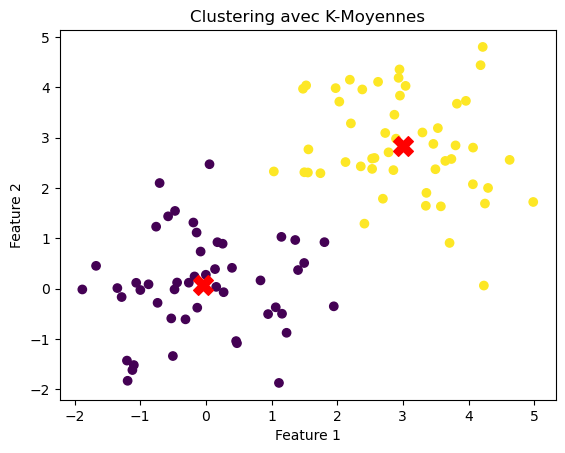

In [51]:
# Visualiser les données avec les clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
plt.title('Clustering avec K-Moyennes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()